In [26]:
import matplotlib.pyplot as plt
import numpy as np

## Plotting of confusion matrix

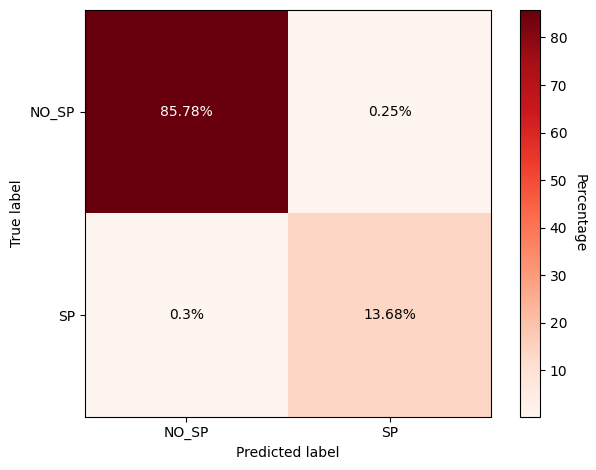

In [41]:
def create_confusion_matrix(title, tp, fp, tn, fn, color="Reds"):

    # Gather results in array and normalize
    results = np.array([
        #   T           F
        [tn, fp], # T
        [fn, tp]  # F
    ])
    results = np.round((results / np.sum(results))*100, 2)

    # Plot as heatmap
    labels_x = ["NO_SP", "SP"]
    labels_y = ["NO_SP", "SP"]

    fig, ax = plt.subplots()
    im = ax.imshow(results, cmap=color)

    ax.set_title(title)
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")
    ax.set_xticks(np.arange(len(labels_y)), labels=labels_y)
    ax.set_yticks(np.arange(len(labels_x)), labels=labels_x)

    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel("Percentage", rotation=-90, va="bottom")

    for i in range(len(labels_x)):
        for j in range(len(labels_y)):
            if results[i, j] < 20:
                color = "black"
            else:
                color = "w"
            text = ax.text(j, i, (str(results[i, j]) + "%"),
                        ha="center", va="center", color=color)
    fig.tight_layout()
    # plt.savefig("figures/"+ title + ".png", bbox_inches='tight')
    plt.show()
create_confusion_matrix(
    "",
    tp=1205,
    tn=7558,
    fn=26,
    fp=22,
    color="Reds"
)

## Parsing and plotting of loss and validation

In [51]:
import json
from os import path
def parse_log(path: path):
    data = None
    with open(path) as f:
        data = f.readlines()
    if not data:
        raise ValueError("Expected data, but data is None")

    losses = []
    evals = []
    for dp in data:
        if "{" in dp:
            dp = dp.replace("'", "\"")
            dp = json.loads(dp)
            if 'loss' in dp.keys():
                losses.append(dp)
            elif 'eval_loss' in dp.keys():
                evals.append(dp)
            elif 'train_runtime' in dp.keys(): 
                ...
            else:
                raise ValueError("Expected either loss, eval or runtime.")
    return losses, evals

In [52]:
def plot_epochs(epochs, y, y_label, title=None, color="tab:blue", show=False):
    plt.title(title) if title else ...
    plt.xlabel("Epoch")
    plt.ylabel(y_label)
    plt.plot(epochs, y, label=y_label, color=color)
    plt.tight_layout()
    plt.show() if show else plt.legend() # this is cheating hehe

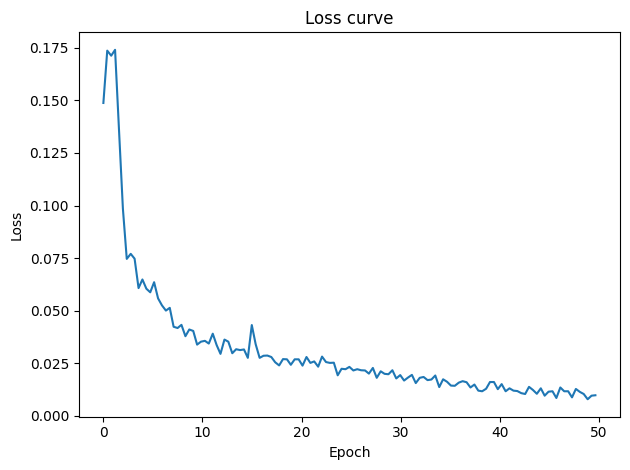

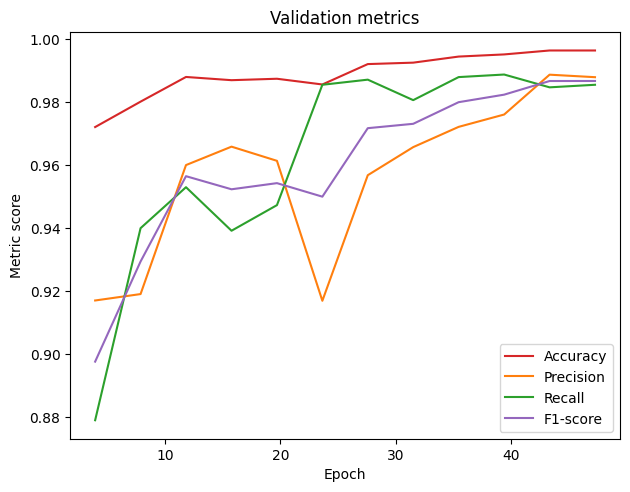

In [53]:
# Parse the huggingface training-log into losses and evals 
losses, evals = parse_log("./logs/log.txt")

losses_epochs = [loss['epoch'] for loss in losses]
losses_loss = [loss['loss'] for loss in losses]

evals_epochs = [eval0['epoch'] for eval0 in evals]

# Extract evaluation metrics
evals_accuracy = [eval0['eval_accuracy'] for eval0 in evals]
evals_precision = [eval0['eval_precision'] for eval0 in evals]
evals_recall = [eval0['eval_recall'] for eval0 in evals]
evals_f1 = [eval0['eval_f1'] for eval0 in evals]

plot_epochs(losses_epochs, losses_loss, "Loss", "Loss curve", show=True)
plot_epochs(evals_epochs, evals_accuracy, "Accuracy", color="tab:red")
plot_epochs(evals_epochs, evals_precision, "Precision", color="tab:orange")
plot_epochs(evals_epochs, evals_recall, "Recall", color="tab:green")
plot_epochs(evals_epochs, evals_f1, "F1-score", color="tab:purple")
plt.title("Validation metrics")
plt.ylabel("Metric score")
plt.show()
